In [2]:
import os
import sys
parent_dir = os.path.abspath('..')
sys.path.append(parent_dir)
from results_data import ResultsCELI
from results_data import open_pkl
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager

globalfont = 'DejaVu Sans'

In [3]:
matplotlib.font_manager.findfont('Cambria')

findfont: Font family ['Cambria'] not found. Falling back to DejaVu Sans.


'/home/jonathon/miniconda3/envs/openmc-env/lib/python3.12/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf'

In [4]:
# out = open_pkl(filename='smathr_ex5_NEA_FINAL_.pkl')
out = open_pkl(filename='homogenized_fhr_testing.pkl')

In [34]:
# available functions:
# out.print_case_settings()
# out.get_BOS_keffs()
# out.get_BOS_isotope()
# out.get_BOS_power()
# out.get_corrector_keffs()
# out.get_BOS_AO
# need to make:
# out.get_corrector_power()
# out.get_corrector_isotope()

In [5]:
out.print_case_settings()

fissionable_mats: [101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116]
fissionable_mats_vols: [60283.4870915574, 60283.4870915574, 60283.4870915574, 60283.4870915574, 60283.4870915574, 60283.4870915574, 60283.4870915574, 60283.4870915574, 60283.4870915574, 60283.4870915574, 60283.4870915574, 60283.4870915574, 60283.4870915574, 60283.4870915574, 60283.4870915574, 60283.4870915574]
residual_number_density: 1e-20
include_non_fission_material_power: True
print_transport_powers: True
system_IHM_mass_grams: 72133.56
specific_power: [200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200]
steplength_days: [0.5, 2.0, 2.5, 5.0, 10, 10, 10, 10, 20, 20, 20, 20, 20, 50, 50, 50, 50, 50]
origen_predictor_divs: 2
addnuxdictbase: addnuxDicts/addnux3Dict.dict
base_triton: triton_base.inp
origen_base: baseOrigenFile.inp
origenResults_F71dir: OrigenResults_F71dir
MonteCarloResults_F33dir: MonteCarloResults_F33
Nprocs: 140
machinefile: nodes.26

In [26]:
BOS_keffs, BOS_sigmas, bu, time = out.get_BOS_keffs()
for idx, this in enumerate(BOS_keffs):
  print(time[idx], this)

0.0 1.233391
0.5 1.199475
2.5 1.179543
5.0 1.174201
10.0 1.166969
20.0 1.156037
30.0 1.145287
40.0 1.134224
50.0 1.1229
70.0 1.100596
90.0 1.079484
110.0 1.059529
130.0 1.041296
150.0 1.024377
200.0 0.987779
250.0 0.958113
300.0 0.933573
350.0 0.912773


In [ ]:
u5, bu, time = out.get_BOS_isotope(material_id=101, isotope='U-235')

Exception: Error occured - likely due to incorrect isotope being requested.

In [13]:
out.get_corrector_keffs(step_num=0)

No corrector iterated keffs for step 0 since we did not do correc to iterations to get to this result.


(None, None)

In [14]:
out.keff_all

{0: {-1: ' best estimate system k-eff 1.233391 + or - 0.000092\n',
  0: ' best estimate system k-eff 1.199677 + or - 0.000072\n',
  1: ' best estimate system k-eff 1.199554 + or - 0.000073\n'},
 1: {-1: ' best estimate system k-eff 1.199475 + or - 0.000087\n',
  0: ' best estimate system k-eff 1.179469 + or - 0.000069\n',
  1: ' best estimate system k-eff 1.179327 + or - 0.000070\n'},
 2: {-1: ' best estimate system k-eff 1.179543 + or - 0.000068\n',
  0: ' best estimate system k-eff 1.174481 + or - 0.000069\n',
  1: ' best estimate system k-eff 1.174414 + or - 0.000076\n'},
 3: {-1: ' best estimate system k-eff 1.174201 + or - 0.000069\n',
  0: ' best estimate system k-eff 1.167073 + or - 0.000066\n',
  1: ' best estimate system k-eff 1.166939 + or - 0.000071\n'},
 4: {-1: ' best estimate system k-eff 1.166969 + or - 0.000066\n',
  0: ' best estimate system k-eff 1.156148 + or - 0.000070\n',
  1: ' best estimate system k-eff 1.156000 + or - 0.000075\n'},
 5: {-1: ' best estimate syste

In [74]:
ao = []
upper_mats = [161, 162, 163, 164, 165, 166, 167, 168]
lower_mats = [169, 170, 171, 172, 173, 174, 175, 176]
for key in out.BOS_power.keys():
  top_p = 0.0
  bottom_p = 0.0
  for mat in upper_mats:
    top_p += out.BOS_power[key][mat]
  for mat in lower_mats:
    bottom_p += out.BOS_power[key][mat]
  ao.append(-1.0*(top_p - bottom_p) / (top_p + bottom_p))
test_bu, _, test_ao = out.get_BOS_AO()
for idx, this in enumerate(test_bu):
  print(test_bu[idx], test_ao[idx])

0.0 -0.0021088783779712457
0.1 -0.0025056364266309865
0.5 -0.0034848804394765898
1.0 -0.0024806419539827314
2.0 -0.0008184990835823359
4.0 -0.002329995681473463
6.0 0.0006477887304846552
8.0 -0.0028372996941742334
10.0 0.0019133325633131086
14.0 0.0004670714619336991
18.0 -0.0007283101697215244
22.0 -0.003677098508062527
26.0 0.0005727146675240657
30.0 0.00313520574787729
40.0 0.0014826579281991272
50.0 -0.004062342885872427
60.0 -0.0034201790564329934
70.0 -0.0032255629638948125


In [40]:
out.print_methods()

available methods for postprocessing results:
out.print_case_settings()
out.get_BOS_keffs()
out.get_BOS_isotope()
out.get_BOS_power()
out.get_corrector_keffs()
out.get_BOS_AO

Plotting:
out.plot_BOS_power_map
out.plot_BOS_power_2d
out.plot_all_power_map
out.plot_BOS_isotopics_map
out.plot_BOS_ao



Need to make the following still
out.get_corrector_power()
out.get_corrector_isotope()
out.get_corrector_AO()


In [41]:
_, _, p = out.get_BOS_power()
p[0].values()

dict_values([0.03754305626688359, 0.04497936311872986, 0.054700288213378336, 0.06296006186043243, 0.06950260597113851, 0.0744032376304241, 0.07772221050623125, 0.07924361562176765, 0.07919340423181596, 0.07755651291939065, 0.07422749776559316, 0.06930176041133172, 0.06265879352072225, 0.05430361823275993, 0.04458771427710663, 0.037116259452294166])

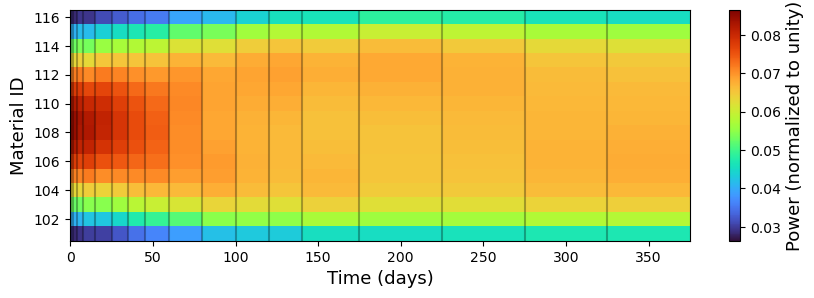

In [19]:
parr, BOS_time = out.plot_BOS_power_map(normalize=True, figsize=(10,3), cmap='turbo', fontname=globalfont,fontsize=13)

In [63]:
np.savetxt('testing_BOS.csv', parr)

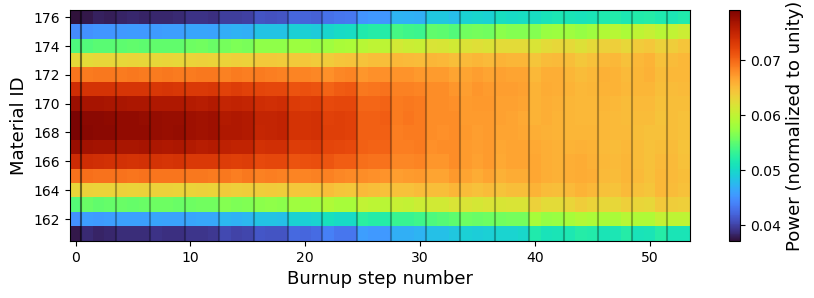

In [59]:
parr = out.plot_all_power_map(normalize=True, figsize=(10,3), cmap='turbo', fontsize=13, fontname=globalfont)

In [60]:
np.savetxt('testing.csv', parr)

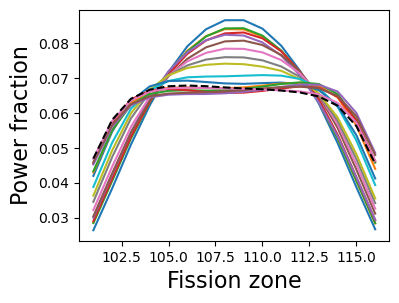

In [22]:
parr, BOS_time = out.plot_BOS_power_2d(normalize=True, figsize=(4,3), fontname=globalfont,fontsize=16)

findfont: Font family 'Cambria' not found.
findfont: Font family 'Cambria' not found.
findfont: Font family 'Cambria' not found.
findfont: Font family 'Cambria' not found.
findfont: Font family 'Cambria' not found.
findfont: Font family 'Cambria' not found.
findfont: Font family 'Cambria' not found.
findfont: Font family 'Cambria' not found.
findfont: Font family 'Cambria' not found.
findfont: Font family 'Cambria' not found.


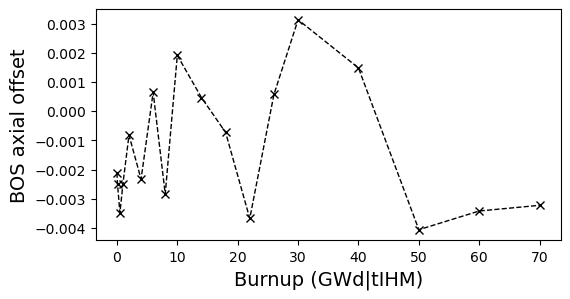

In [69]:
out.plot_BOS_ao(timeOnX=False, figsize=(6,3))


findfont: Font family 'Cambria' not found.
findfont: Font family 'Cambria' not found.
findfont: Font family 'Cambria' not found.
findfont: Font family 'Cambria' not found.
findfont: Font family 'Cambria' not found.
findfont: Font family 'Cambria' not found.
findfont: Font family 'Cambria' not found.
findfont: Font family 'Cambria' not found.
findfont: Font family 'Cambria' not found.
findfont: Font family 'Cambria' not found.


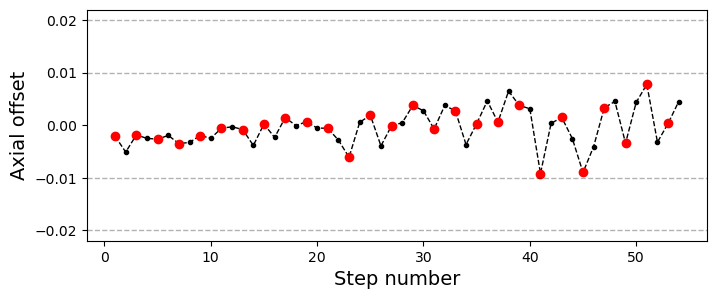

In [46]:
out.plot_all_ao(figsize=( 8,3), mod=2, fontsize=14, fontname='Cambria', extraLines=[-0.02, -0.01, 0.02, 0.01])

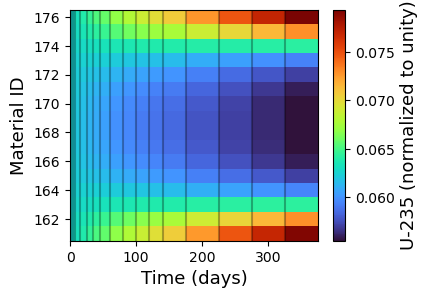

In [47]:
u235arr = out.plot_BOS_isotopics_map(isotope='U-235',
                       normalize=True, figsize=(4,3), cmap='turbo', fontsize=13, fontname=globalfont)

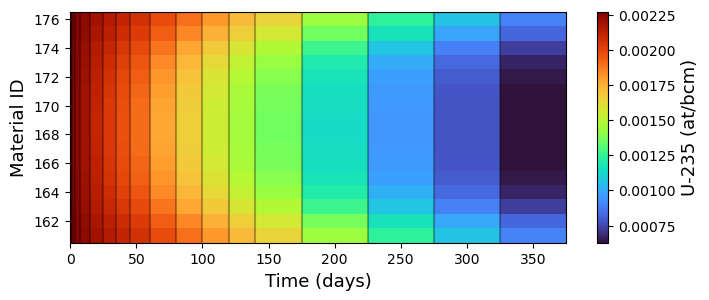

In [48]:
u235arr = out.plot_BOS_isotopics_map(isotope='U-235',
                       normalize=False, figsize=(8,3), cmap='turbo', fontsize=13, fontname=globalfont)

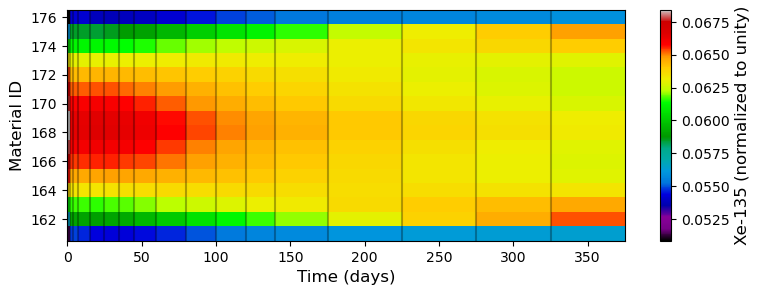

In [49]:
xe135arr = out.plot_BOS_isotopics_map(isotope='Xe-135',
                       normalize=True, figsize=(9,3), cmap='nipy_spectral', fontsize=12, fontname=globalfont)

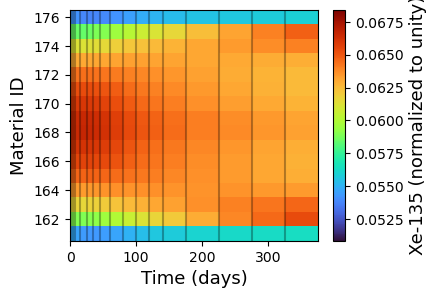

In [50]:
xe135arr = out.plot_BOS_isotopics_map(isotope='Xe-135',
                       normalize=True, figsize=(4,3), cmap='turbo', fontsize=13, fontname=globalfont)

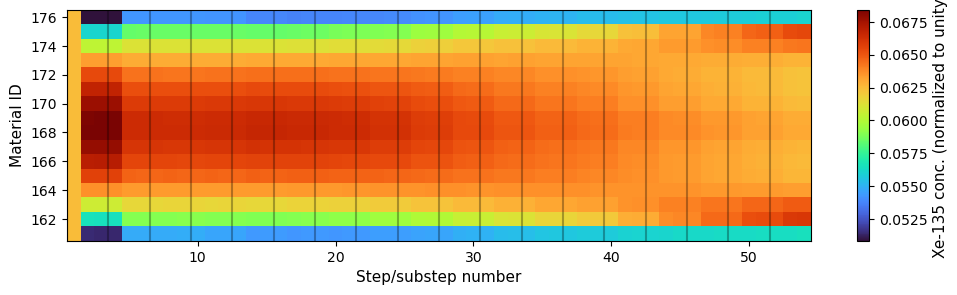

In [51]:
parr = out.plot_all_isotopics_map(isotope='Xe-135',
                       normalize=True, figsize=(12,3), cmap='turbo', fontsize=11, fontname=globalfont)

[np.float64(-0.125),
 np.float64(-0.13432065648376423),
 np.float64(-0.1344268271412407),
 np.float64(-0.1344268271412407),
 np.float64(-0.13021334151799918),
 np.float64(-0.13021305299628289),
 np.float64(-0.13021305299628289),
 np.float64(-0.13001628068713666),
 np.float64(-0.13004321994996795),
 np.float64(-0.13004321994996795),
 np.float64(-0.13033031509593984),
 np.float64(-0.13037419113783166),
 np.float64(-0.13037419113783166),
 np.float64(-0.13051455676665885),
 np.float64(-0.13050228220369792),
 np.float64(-0.13050228220369792),
 np.float64(-0.13032227899851834),
 np.float64(-0.13031472865939342),
 np.float64(-0.13031472865939342),
 np.float64(-0.1303892953495466),
 np.float64(-0.13021916817581042),
 np.float64(-0.13021916817581042),
 np.float64(-0.1292072410691278),
 np.float64(-0.12924282825839323),
 np.float64(-0.12924282825839323),
 np.float64(-0.12902117316968317),
 np.float64(-0.12881919548974044),
 np.float64(-0.12881919548974044),
 np.float64(-0.12823075763335096),
 np

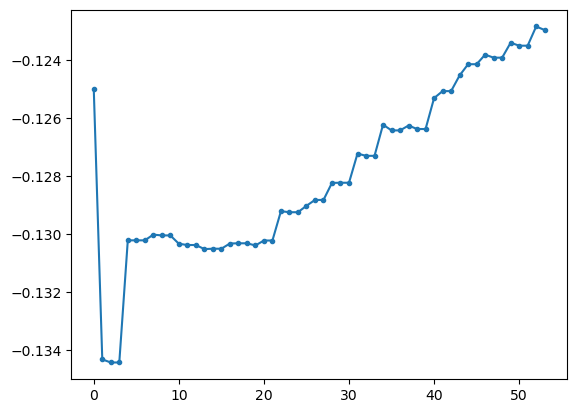

In [52]:
offset = []
for step in range(np.shape(parr)[1]):
  top = 0.0
  bottom = 0.0
  for mat in range(np.shape(parr)[0]):
    if mat <= 6:
      top += parr[mat,step]
    else:
      bottom += parr[mat,step]
  offset += [(top-bottom)/(top+bottom)]
plt.plot(offset, '-o', markersize=3)


offset

findfont: Font family 'Cambria' not found.
findfont: Font family 'Cambria' not found.
findfont: Font family 'Cambria' not found.
findfont: Font family 'Cambria' not found.
findfont: Font family 'Cambria' not found.
findfont: Font family 'Cambria' not found.
findfont: Font family 'Cambria' not found.
findfont: Font family 'Cambria' not found.
findfont: Font family 'Cambria' not found.
findfont: Font family 'Cambria' not found.


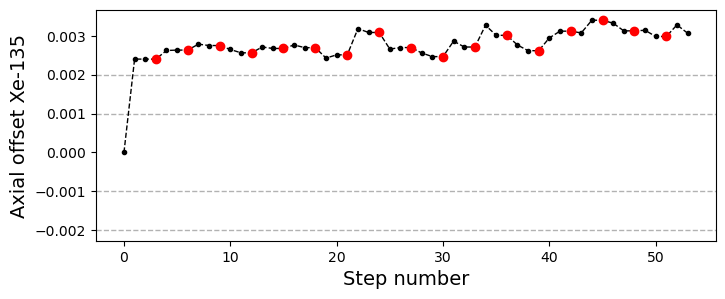

In [53]:
out.plot_all_isotopics_ao(isotope='Xe-135', figsize=(8,3), extraLines=[-0.001, -0.002, 0.002, 0.001])

IndexError: index 54 is out of bounds for axis 1 with size 54

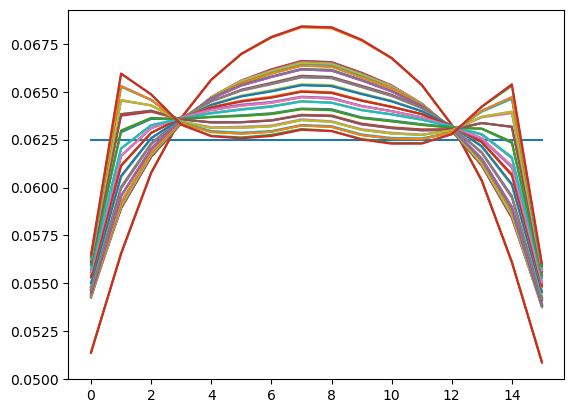

In [54]:
for i in range(55):
  plt.plot(parr[:,i] / sum(parr[:,i]))